In [ ]:
#%matplotlib inline
#import sdf
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
#from colour import Color

######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
#print 'electric field unit: '+str(exunit)
#print 'magnetic field unit: '+str(bxunit)
#print 'density unit nc: '+str(denunit)

font = {'family' : 'monospace',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 20,  
       }  

nsteps=10000
t=np.linspace(0,200*np.pi,nsteps)
dt=t[-1]-t[-2]
vy=np.zeros(nsteps)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

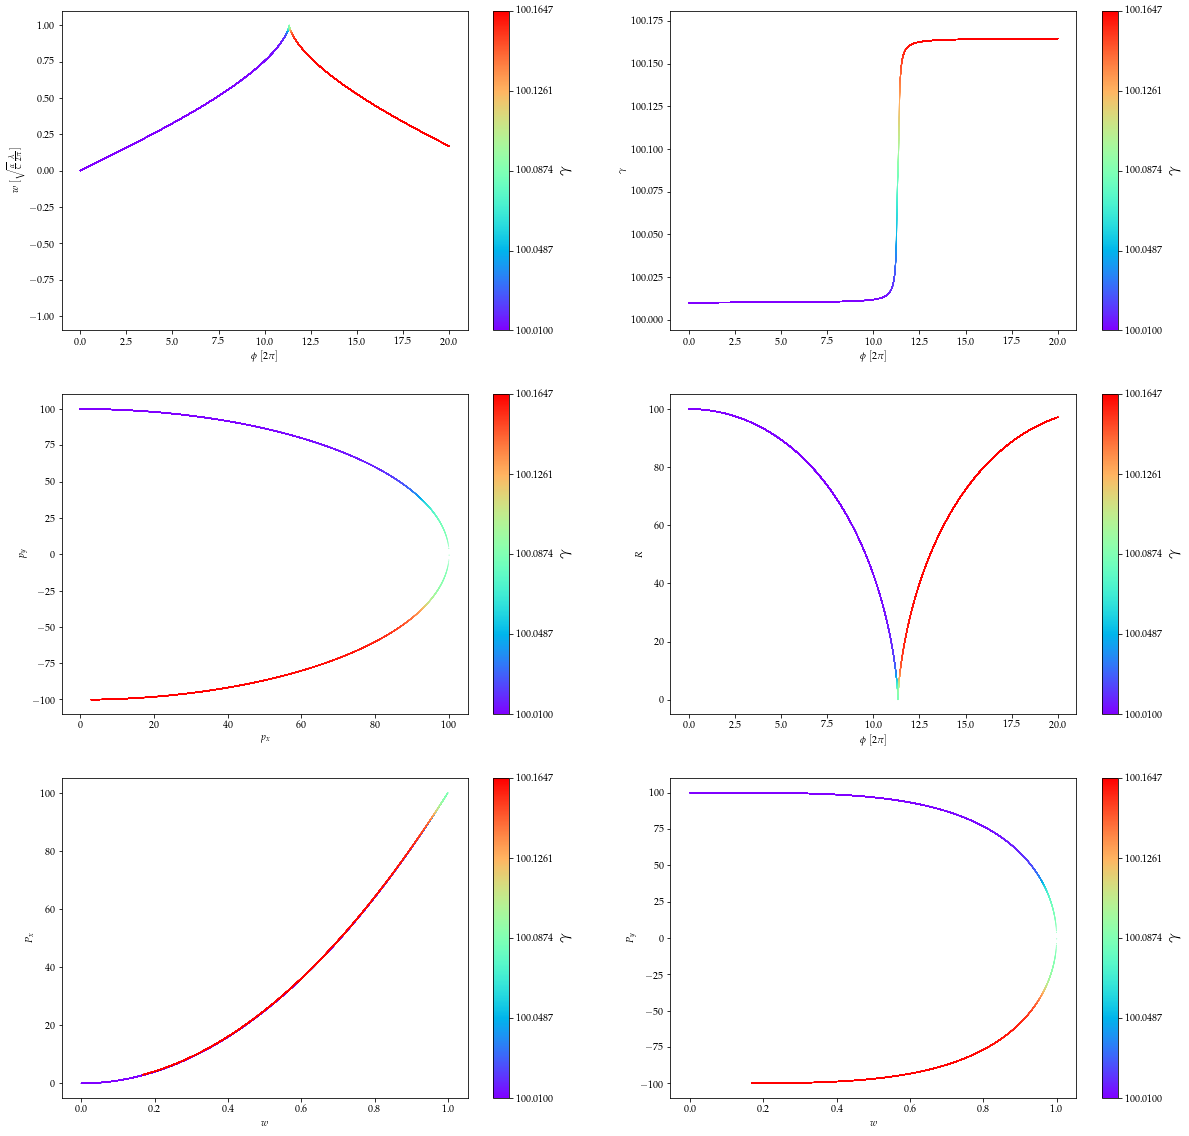

In [30]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=200000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -00.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R

# plot results
plt.subplot(3,2,1)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
plt.scatter(t/2/np.pi,w, c=gamma, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$')
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$')
plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(3,2,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t/2/np.pi,gamma, c=gamma, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$')
plt.ylabel(r'$\gamma$')
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(3,2,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(px,py,'g-',label=r'$p_x-p_y$')
plt.scatter(px,py, c=gamma, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$p_x$')
plt.ylabel(r'$p_y$')
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(3,2,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t/2/np.pi,R, c=gamma, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$')
plt.ylabel(r'$R$')
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(3,2,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(w,px, c=gamma, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$')
plt.ylabel(r'$P_x$')
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(3,2,6)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(w,py, c=gamma, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$')
plt.ylabel(r'$P_y$')
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 20)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./numerical_solution_a=50_p=50_alpha=0.1.png',format='png',dpi=160)
#plt.close("all")

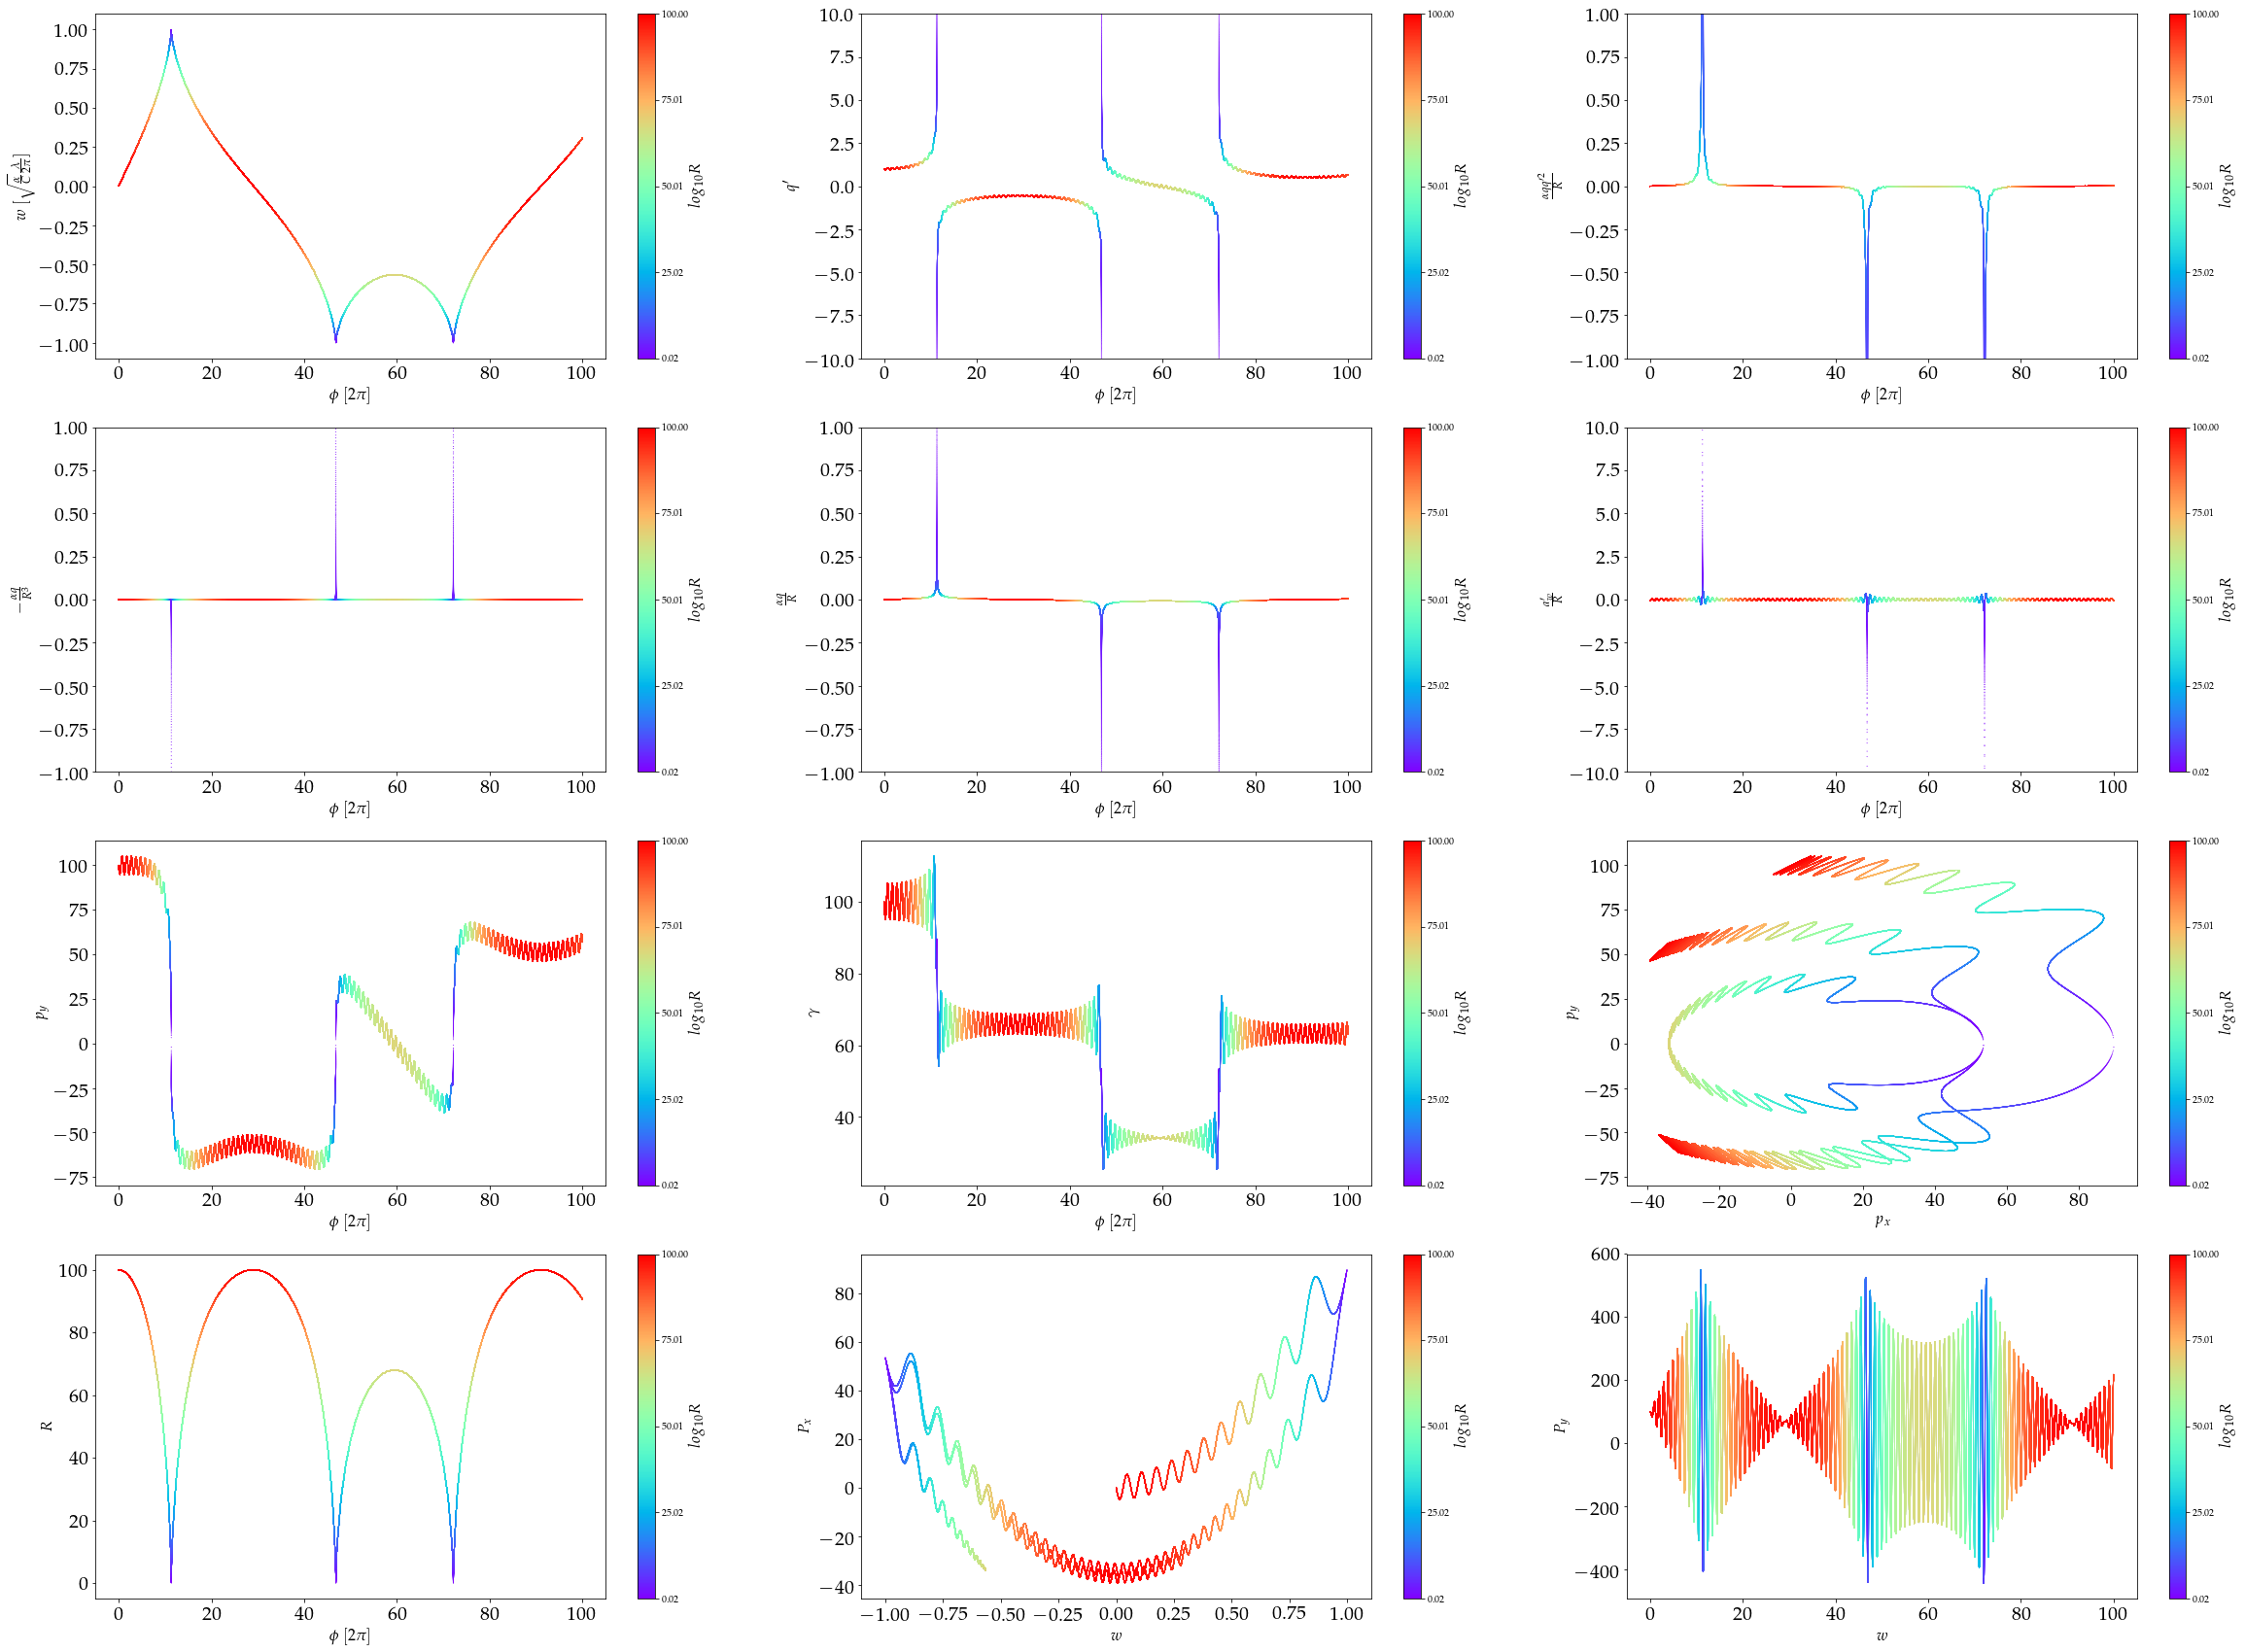

In [15]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=1000000

# time points
t = np.linspace(0,100*2*np.pi,nsteps)

# step input laser a0
a0 = -5.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5


term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 #35000
n_max=999999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results
plt.subplot(4,3,1)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max]/R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$q^\prime$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-10,10)
plt.legend(loc='best')

plt.subplot(4,3,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term1[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{\alpha qq^{\prime 2}}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')


plt.subplot(4,3,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term2[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$-\frac{\alpha q}{R^3}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')

plt.subplot(4,3,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term3[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{\alpha q}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')

plt.subplot(4,3,6)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term4[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{a_w^\prime}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-10,10)
plt.legend(loc='best')

# plot results
plt.subplot(4,3,7)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$p_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,8)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,9)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(px,py,'g-',label=r'$p_x-p_y$')
plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$p_x$',fontdict=font)
plt.ylabel(r'$p_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,10)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$',fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,11)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(w[n_min:n_max],px[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$',fontdict=font)
plt.ylabel(r'$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')



H=(1+py[n_min:n_max]**2)/2/R[n_min:n_max]+0.5*R[n_min:n_max]-q[n_min:n_max]*a0[n_min:n_max]
plt.subplot(4,3,12)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t[n_min:n_max]/2/np.pi,H, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(w[n_min:n_max], py, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$',fontdict=font)
plt.ylabel(r'$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')


#plt.show()
fig = plt.gcf()
fig.set_size_inches(40, 30)
#fig.set_size_inches(5, 4.5)
fig.savefig('./terms/p=100_alpha=0.01_a=500.0.png',format='png',dpi=160)
#plt.close("all")

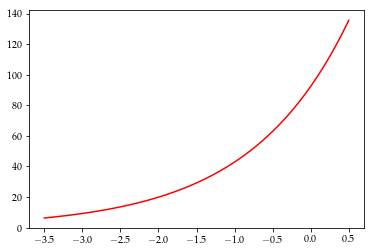

In [3]:
a0=200.0
x=np.linspace(-3.5,0.5,101)
P0=(a0**2*10**x/0.05)**0.333
plt.plot(x,P0,'-r')
plt.show()

In [92]:
np.log10(10)

1.0

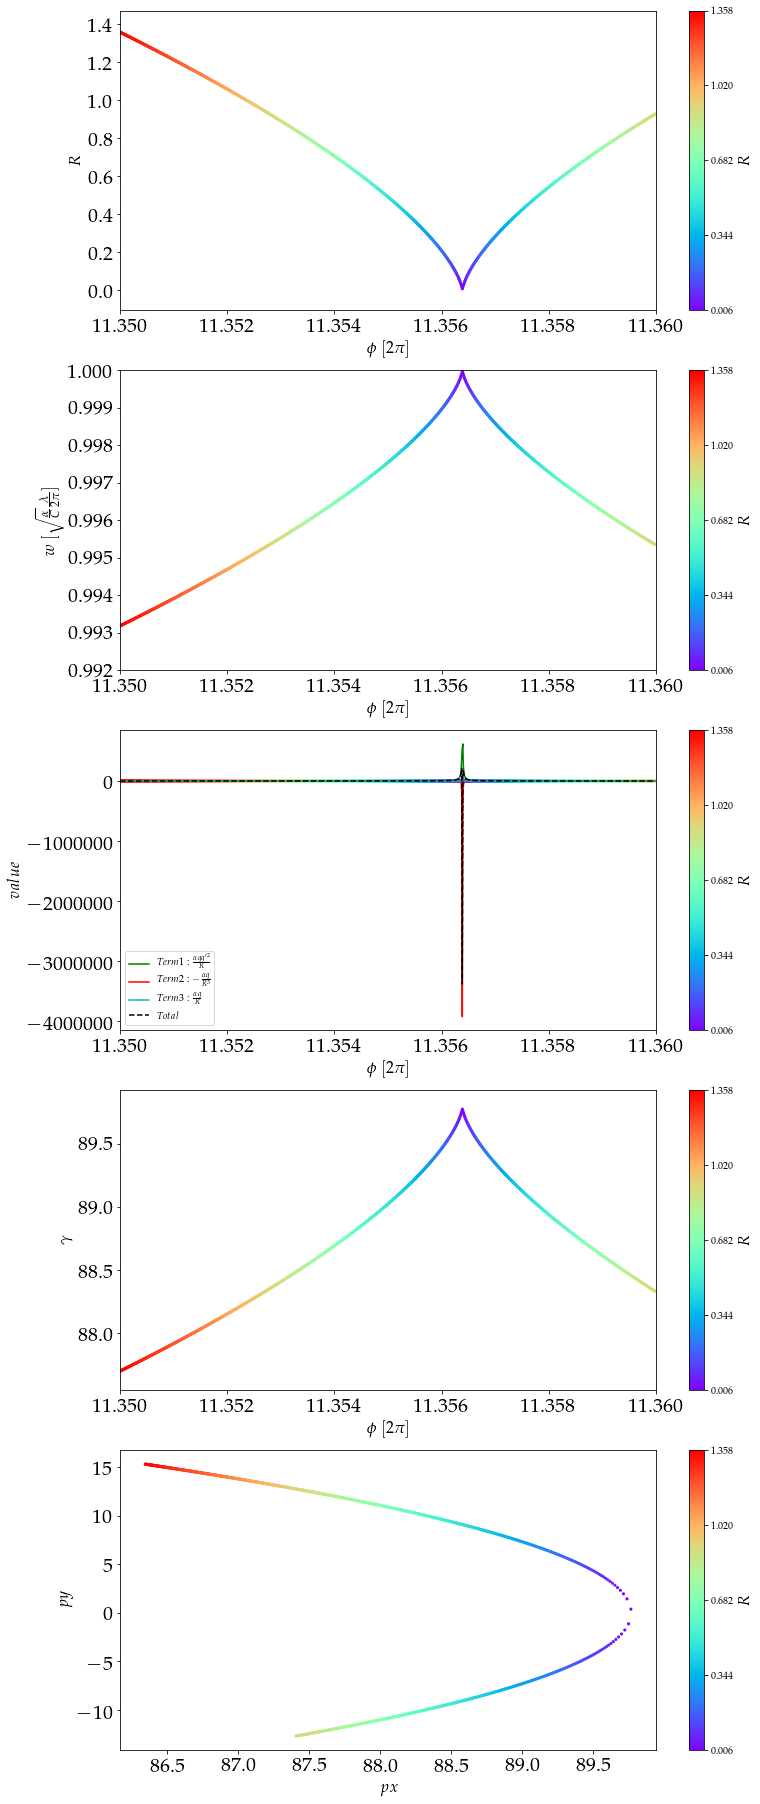

In [45]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=2000000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -5.0*np.cos(t)
E0 = -1.0*a0
# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5


term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=1134999
n_max=1135999 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results
grid_x = np.linspace(11.325,11.335,200)*2*np.pi
grid_y = np.linspace(-1.0,1.0,200)

plt.subplot(5,1,1)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee],orientation="horizontal")
#cbar.set_label(r'$a0 [m_ec/e]$',fontdict=font)
plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=10, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.xlim(11.35,11.36)
plt.legend(loc='best')

plt.subplot(5,1,2)
[grid_x,grid_y] = np.meshgrid(grid_x, grid_y)
ex = 100.0*np.cos(grid_x)
eee=np.max([-np.min(ex.T),np.max(ex.T)])
levels = np.linspace(-eee, eee, 40)
plt.contourf(grid_x/2/np.pi, grid_y, ex, levels=levels, cmap=cm.bwr)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee],orientation="horizontal")
#cbar.set_label(r'$a0 [m_ec/e]$',fontdict=font)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=10, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(0.992,1.00)
plt.xlim(11.35,11.36)
plt.legend(loc='best')

plt.subplot(5,1,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
#plt.scatter(t[n_min:n_max]/2/np.pi,term1[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term2[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term3[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term4[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.plot(t[n_min:n_max]/2/np.pi,term1[n_min:n_max],'-g',label=r'$Term1:\frac{\alpha qq^{\prime 2}}{R}$')
plt.plot(t[n_min:n_max]/2/np.pi,term2[n_min:n_max],'-r',label=r'$Term2:-\frac{\alpha q}{R^3}$')
plt.plot(t[n_min:n_max]/2/np.pi,term3[n_min:n_max],'-c',label=r'$Term3:\frac{\alpha q}{R}$')
plt.scatter(t[n_min:n_max]/2/np.pi,term4[n_min:n_max], c=lgR, s=10, cmap='rainbow', edgecolors='None')
total=term1+term2+term3+term4
plt.plot(t[n_min:n_max]/2/np.pi,total[n_min:n_max],'--k',label=r'$Total$')
#plt.plot(t[n_min:n_max]/2/np.pi,term4[n_min:n_max],'-g',label=r'$Term4:\frac{a_w^\prime}{R}$')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.legend(loc='best',framealpha=0.0)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$value $',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-20,80)
plt.xlim(11.35,11.36)
plt.legend(loc='best')

plt.subplot(5,1,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
#plt.scatter(t[n_min:n_max]/2/np.pi,term1[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term2[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term3[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term4[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=10, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.legend(loc='best',framealpha=0.0)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-10,10)
plt.xlim(11.35,11.36)
plt.legend(loc='best')

plt.subplot(5,1,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
#plt.scatter(t[n_min:n_max]/2/np.pi,term1[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term2[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term3[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(t[n_min:n_max]/2/np.pi,term4[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=10, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.legend(loc='best',framealpha=0.0)
#plt.yscale("log")
plt.xlabel(r'$px$',fontdict=font)
plt.ylabel(r'$py$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-10,10)
#plt.xlim(11.35,11.36)
plt.legend(loc='best')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(12, 32)
#fig.set_size_inches(5, 4.5)
fig.savefig('./terms/p=100_alpha=0.01_a=5.0_zoom_in.png',format='png',dpi=160)
#plt.close("all")

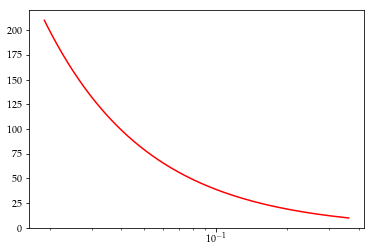

In [58]:
a0=100.0*0.01
p0=np.linspace(10,210,201)
alpha=(a0*(p0-1)**0.5*4*p0/(2*p0**2-1))**2
plt.plot(alpha,p0,'-r')
plt.xscale('log')

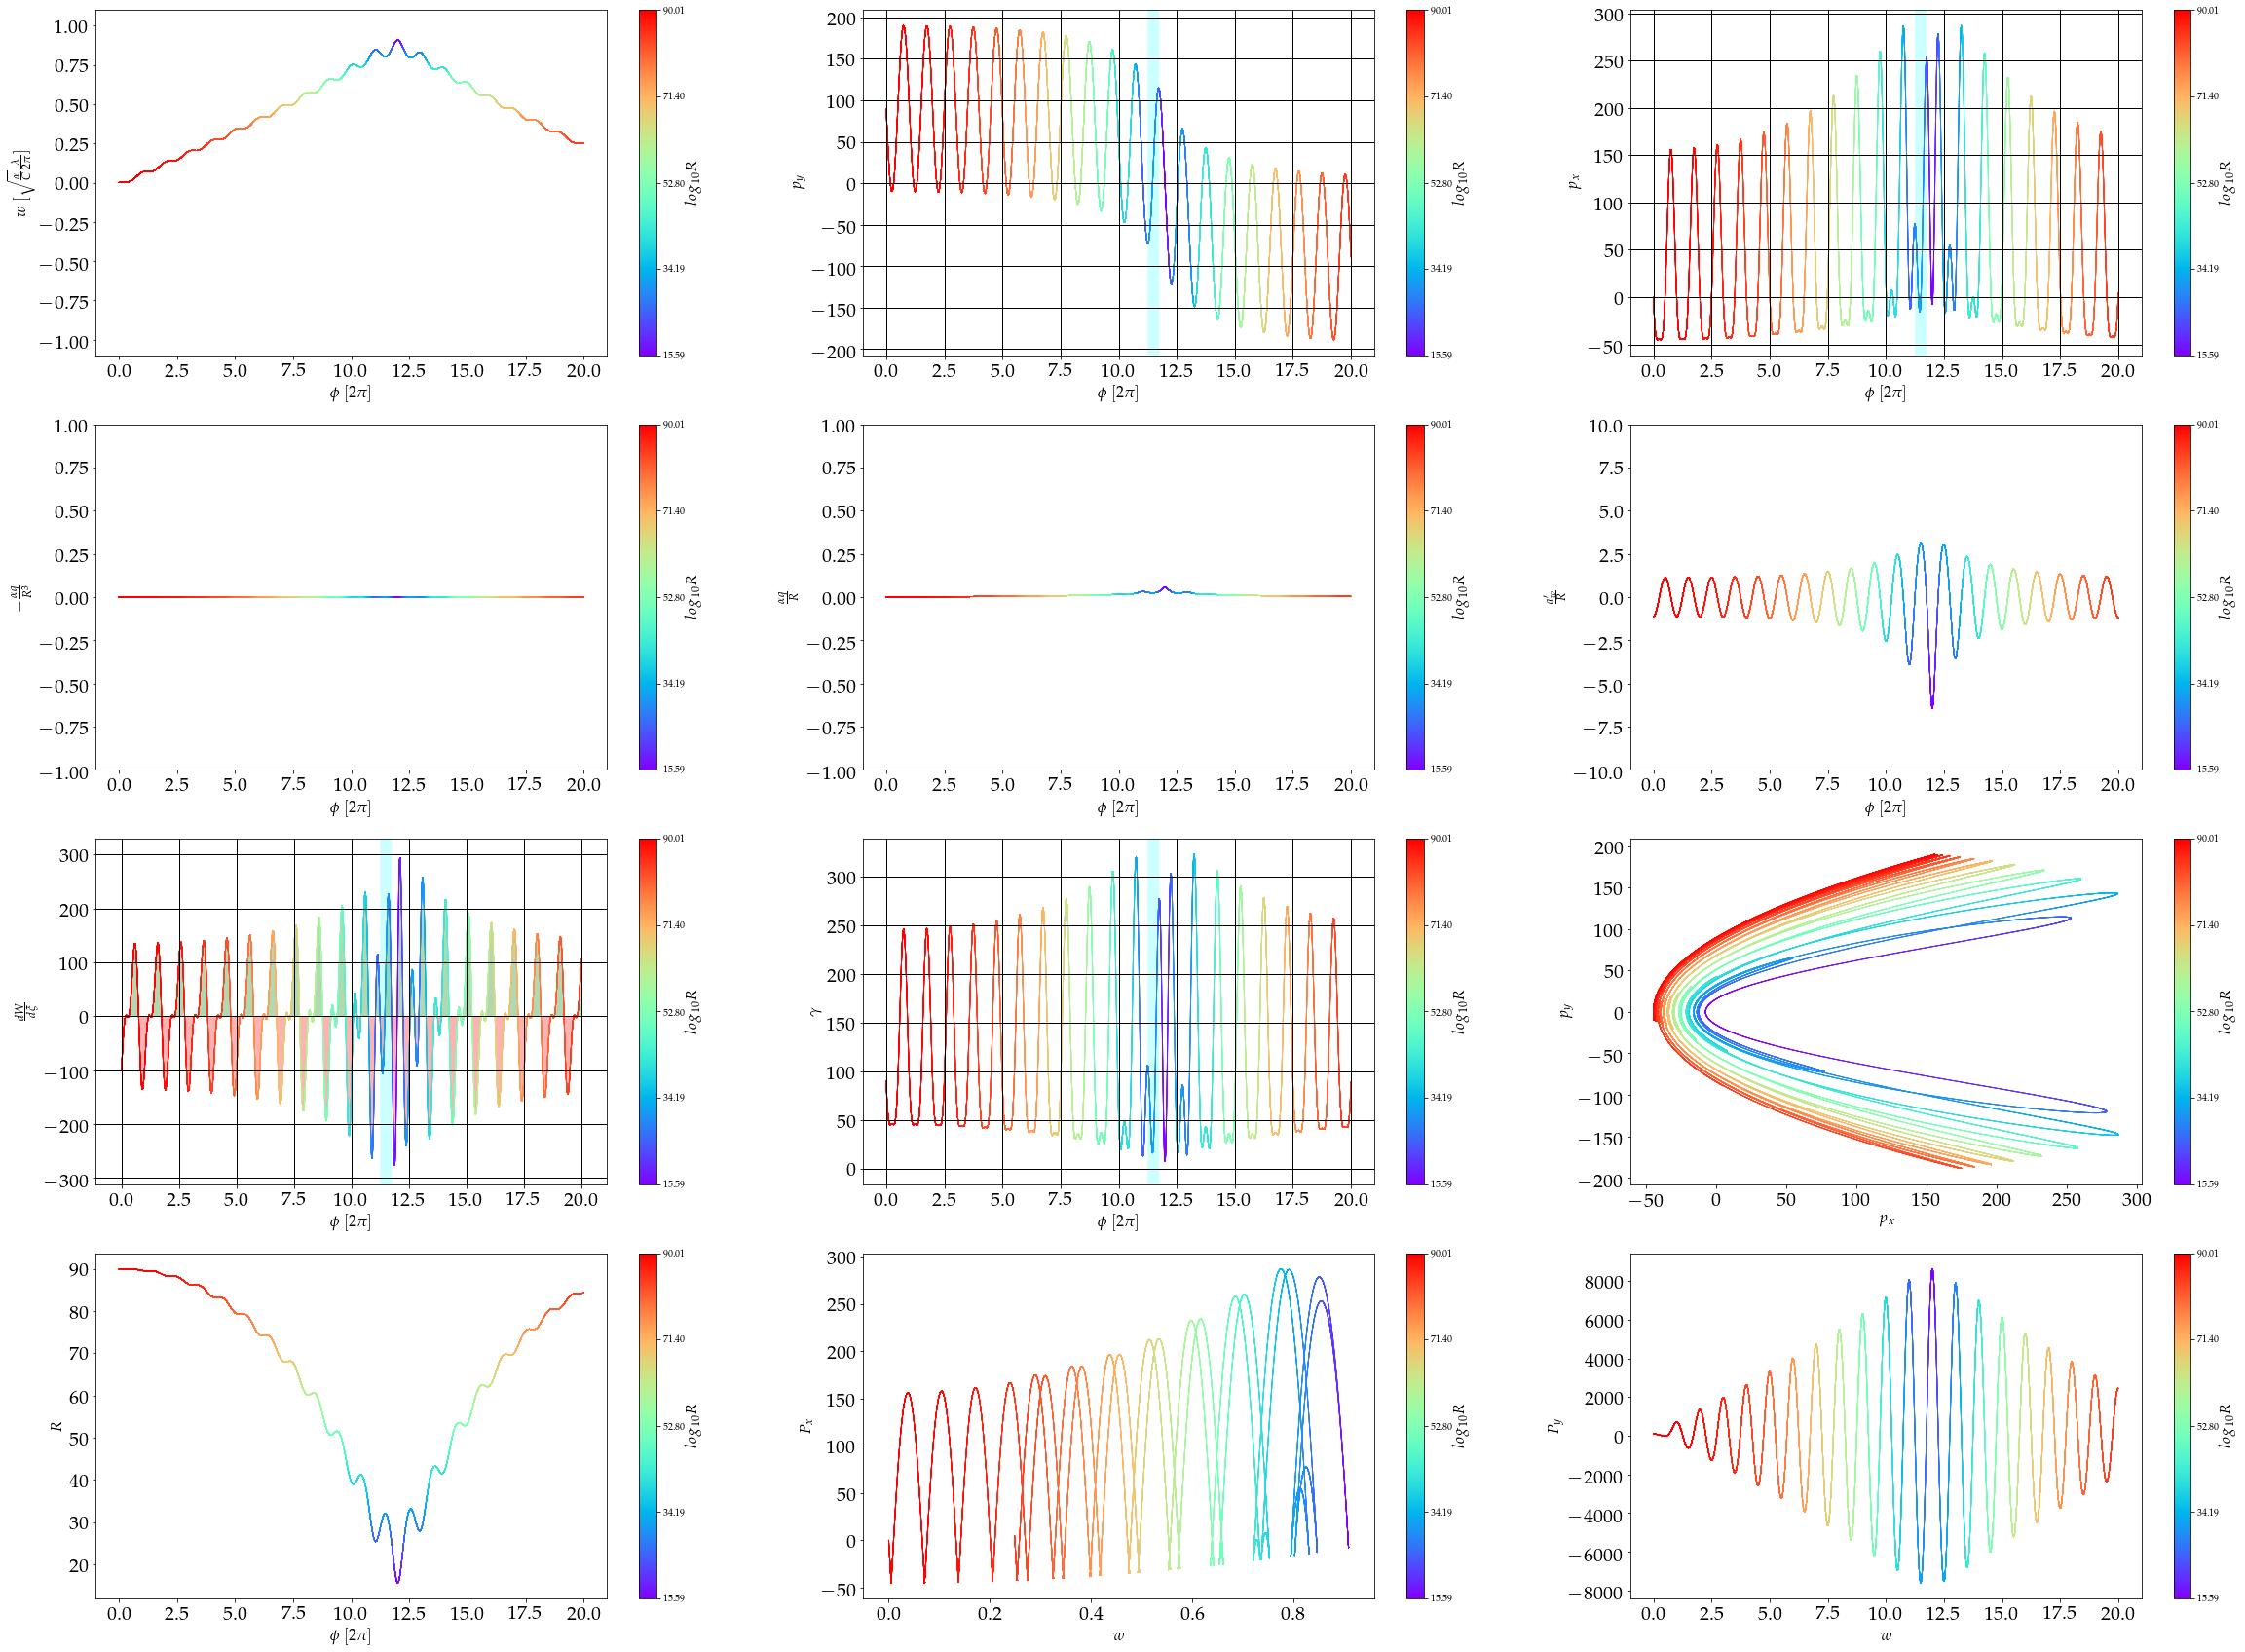

In [50]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=90.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=200000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -100.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=199999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results
plt.subplot(4,3,1)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1.1,1.1)
plt.legend(loc='best')

ax=plt.subplot(4,3,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$p_y$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-10,10)
plt.legend(loc='best')

ax=plt.subplot(4,3,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,px[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$p_x$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1,1)
plt.legend(loc='best')


plt.subplot(4,3,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term2[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$-\frac{\alpha q}{R^3}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')

plt.subplot(4,3,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term3[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{\alpha q}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')

plt.subplot(4,3,6)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term4[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{a_w^\prime}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-10,10)
plt.legend(loc='best')

# plot results
ax=plt.subplot(4,3,7)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dW}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-700.1,700.1)
plt.legend(loc='best')

ax=plt.subplot(4,3,8)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,9)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(px,py,'g-',label=r'$p_x-p_y$')
plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$p_x$',fontdict=font)
plt.ylabel(r'$p_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,10)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$',fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,11)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(w[n_min:n_max],px[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$',fontdict=font)
plt.ylabel(r'$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')



H=(1+py[n_min:n_max]**2)/2/R[n_min:n_max]+0.5*R[n_min:n_max]-q[n_min:n_max]*a0[n_min:n_max]
plt.subplot(4,3,12)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t[n_min:n_max]/2/np.pi,H, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(w[n_min:n_max], py, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$',fontdict=font)
plt.ylabel(r'$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')


#plt.show()
fig = plt.gcf()
fig.set_size_inches(40, 30)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./sum_numerical2/p=100_alpha=0.01_a=80.0.png',format='png',dpi=240)
#plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


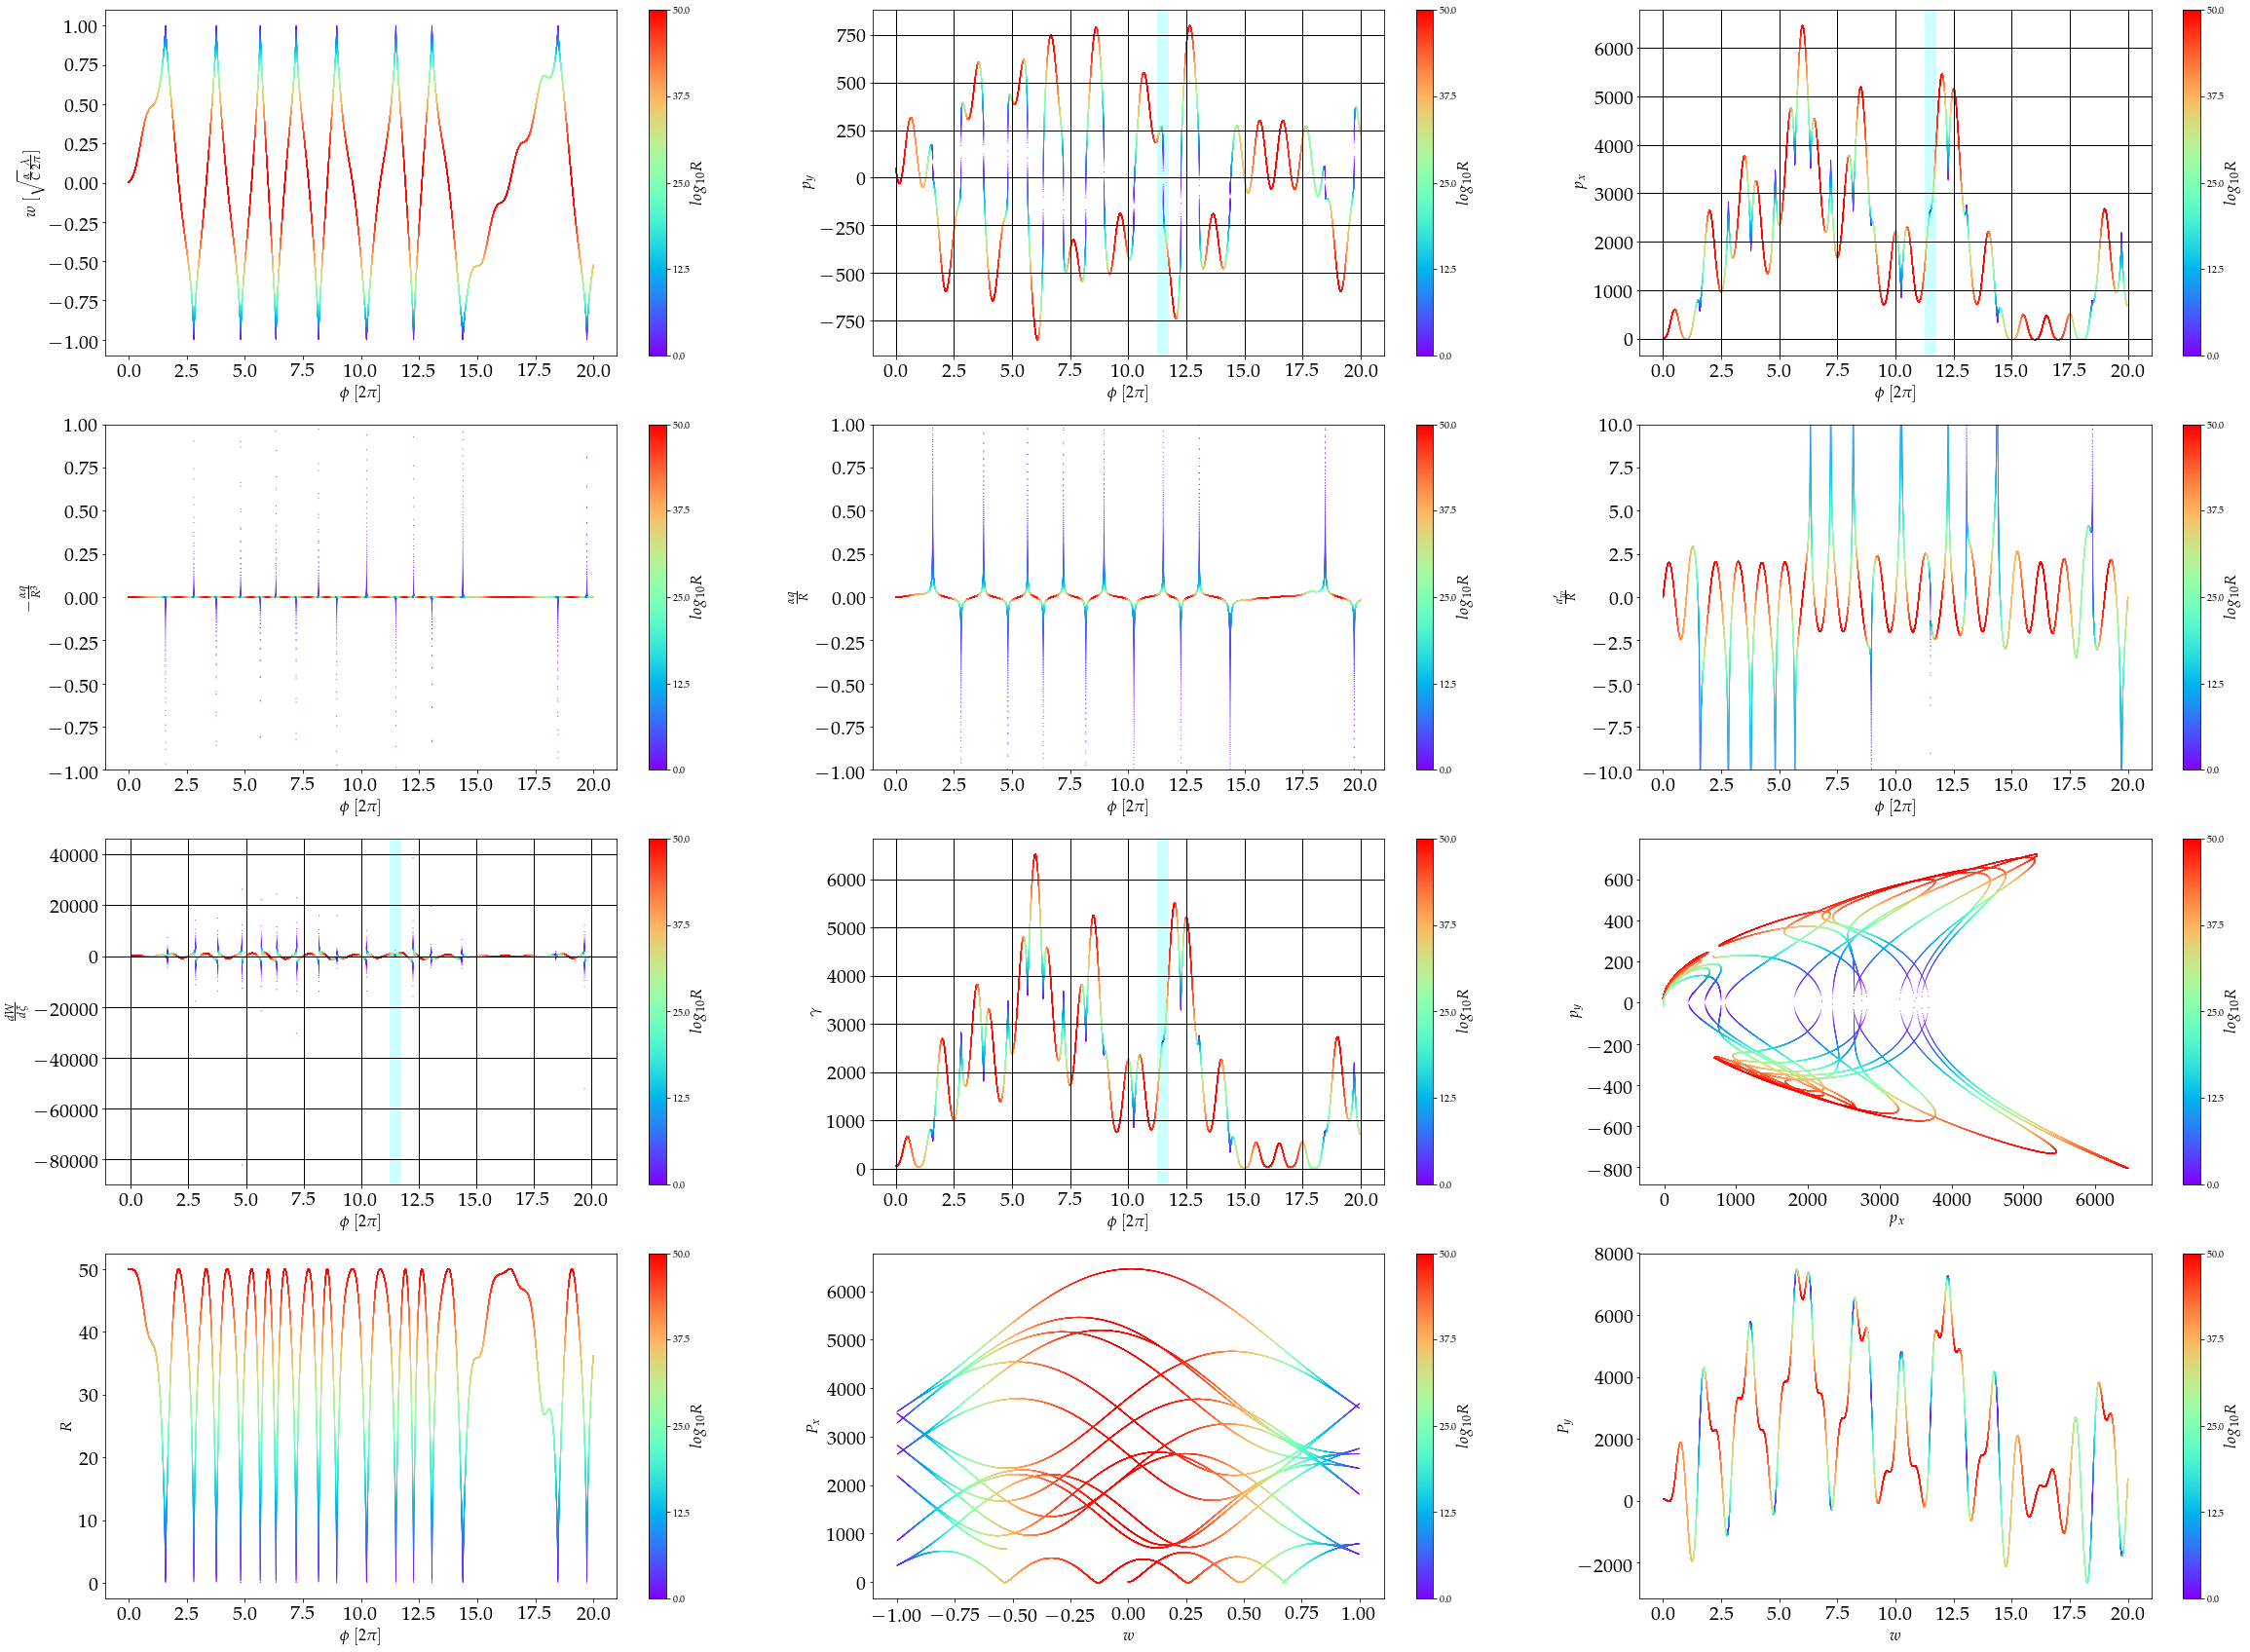

In [80]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=50.0
alpha=10.0**(-1.5)
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=200000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -100.0*np.cos(t+np.pi/2.0)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=199999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results
plt.subplot(4,3,1)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1.1,1.1)
plt.legend(loc='best')

ax=plt.subplot(4,3,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max]-np.sin(t[n_min:n_max])*150, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$p_y$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-10,10)
plt.legend(loc='best')

ax=plt.subplot(4,3,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,px[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$p_x$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1,1)
plt.legend(loc='best')


plt.subplot(4,3,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term2[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$-\frac{\alpha q}{R^3}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')

plt.subplot(4,3,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term3[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{\alpha q}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')

plt.subplot(4,3,6)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term4[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{a_w^\prime}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-10,10)
plt.legend(loc='best')

# plot results
ax=plt.subplot(4,3,7)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dW}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-700.1,700.1)
plt.legend(loc='best')

ax=plt.subplot(4,3,8)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,9)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(px,py,'g-',label=r'$p_x-p_y$')
plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$p_x$',fontdict=font)
plt.ylabel(r'$p_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,10)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$',fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,11)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(w[n_min:n_max],px[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$',fontdict=font)
plt.ylabel(r'$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')



H=(1+py[n_min:n_max]**2)/2/R[n_min:n_max]+0.5*R[n_min:n_max]-q[n_min:n_max]*a0[n_min:n_max]
plt.subplot(4,3,12)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t[n_min:n_max]/2/np.pi,H, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(w[n_min:n_max], py, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$',fontdict=font)
plt.ylabel(r'$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')


#plt.show()
fig = plt.gcf()
fig.set_size_inches(40, 30)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./sum_numerical2/p=100_alpha=0.01_a=80.0.png',format='png',dpi=240)
#plt.close("all")

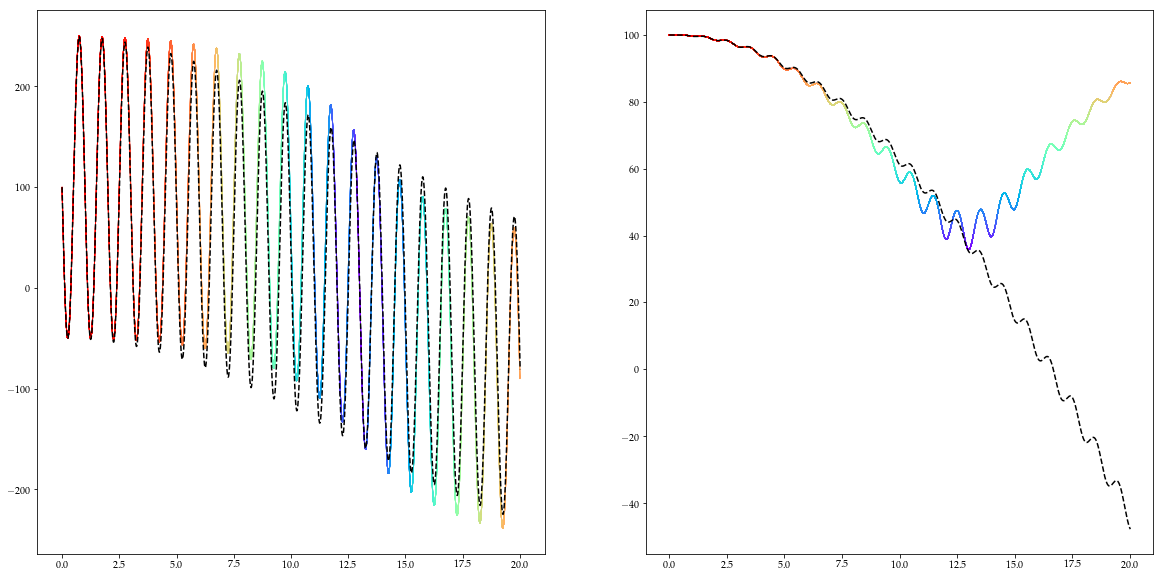

In [39]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=200000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -150.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=199999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

plt.subplot(1,2,1)
x=np.linspace(0,20*2*np.pi,2001)
y=100*np.cos(x/(4*12.5))-np.sin(x)*150
plt.plot(x/2/3.14,y,'--k')
plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')

plt.subplot(1,2,2)
plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
p0=100.0
alpha=0.01
a0=150.0
T=4*0.71*(p0/alpha)**0.5
b=alpha**0.5/p0**1.5*(T*p0*np.sin(x/T)+a0*np.cos(x)-a0)
#k=((9.0*b**2-4)-3*b)**0.33333/(2.0)**0.333333
#t=k+1.0/k
y=(1-b**2)*p0

plt.plot(x/2/3.14,y,'--k')

fig = plt.gcf()
fig.set_size_inches(20, 10)

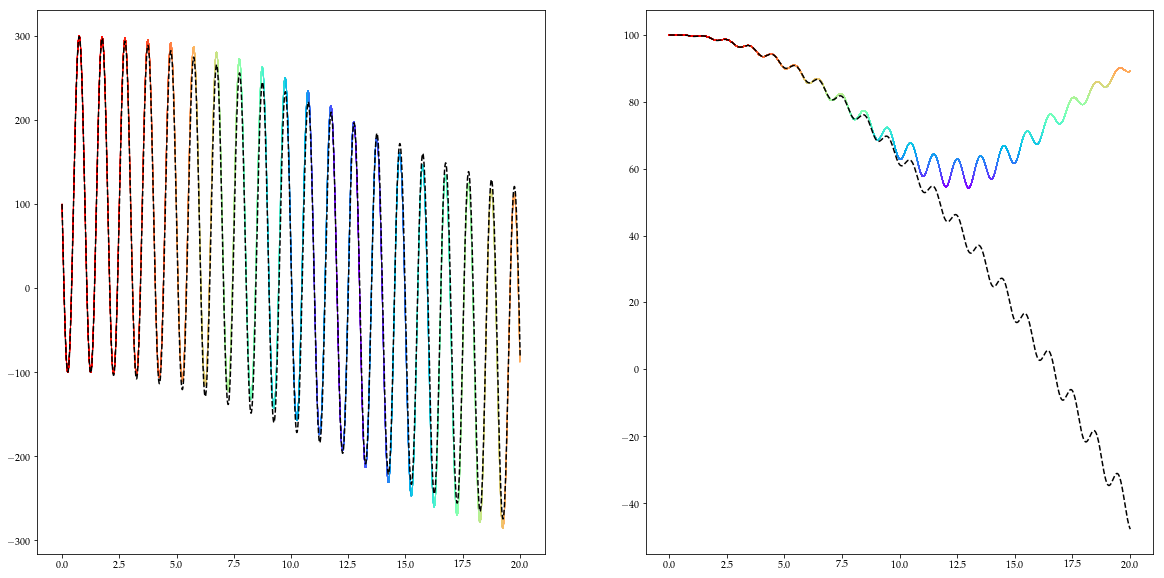

In [45]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=200000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -200.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=199999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

p0=100.0
alpha=0.01
a0=200.0
plt.subplot(1,2,1)
x=np.linspace(0,20*2*np.pi,2001)
y=p0*np.cos(x/(4*12.5))-np.sin(x)*
plt.plot(x/2/3.14,y,'--k')
plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')

plt.subplot(1,2,2)
plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
T=4*0.71*(p0/alpha)**0.5
b=alpha**0.5/p0**1.5*(T*p0*np.sin(x/T)+a0*np.cos(x)-a0)
#k=((9.0*b**2-4)-3*b)**0.33333/(2.0)**0.333333
#t=k+1.0/k
y=(1-b**2)*p0

plt.plot(x/2/3.14,y,'--k')

fig = plt.gcf()
fig.set_size_inches(20, 10)

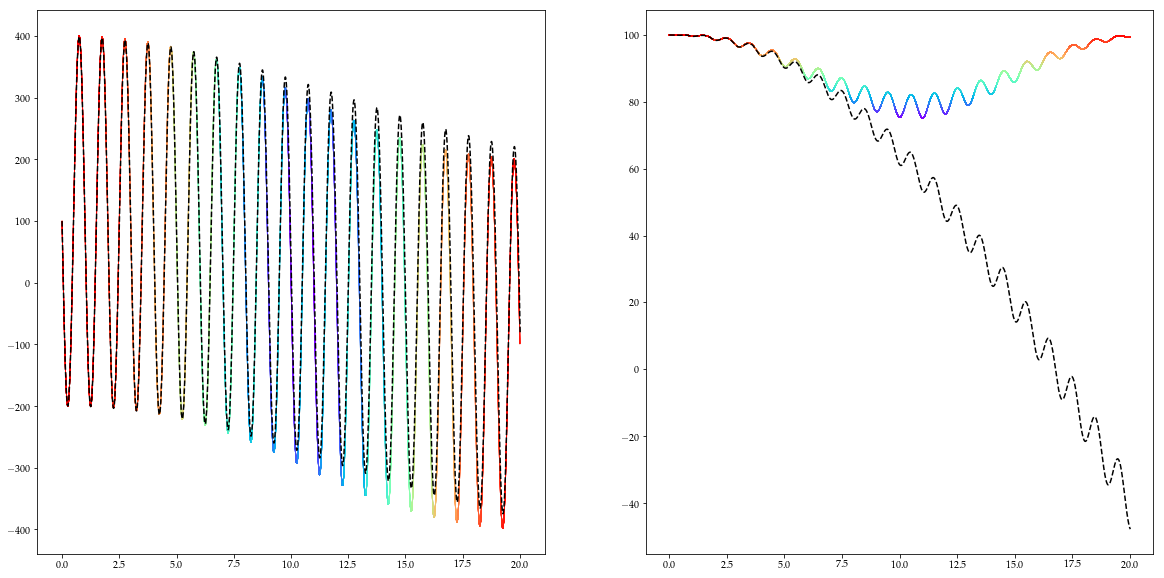

In [53]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=200000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -300.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=199999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

p0=100.0
alpha=0.01
a0=300.0

plt.subplot(1,2,1)
x=np.linspace(0,20*2*np.pi,2001)
y=p0*np.cos(x/(4*12.5))-np.sin(x)*a0
plt.plot(x/2/3.14,y,'--k')
plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')

plt.subplot(1,2,2)
plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')

T=4*0.71*(p0/alpha)**0.5
b=alpha**0.5/p0**1.5*(T*p0*np.sin(x/T)+a0*np.cos(x)-a0)
#k=((9.0*b**2-4)-3*b)**0.33333/(2.0)**0.333333
#t=k+1.0/k
y=(1-b**2)*p0

plt.plot(x/2/3.14,y,'--k')

fig = plt.gcf()
fig.set_size_inches(20, 10)

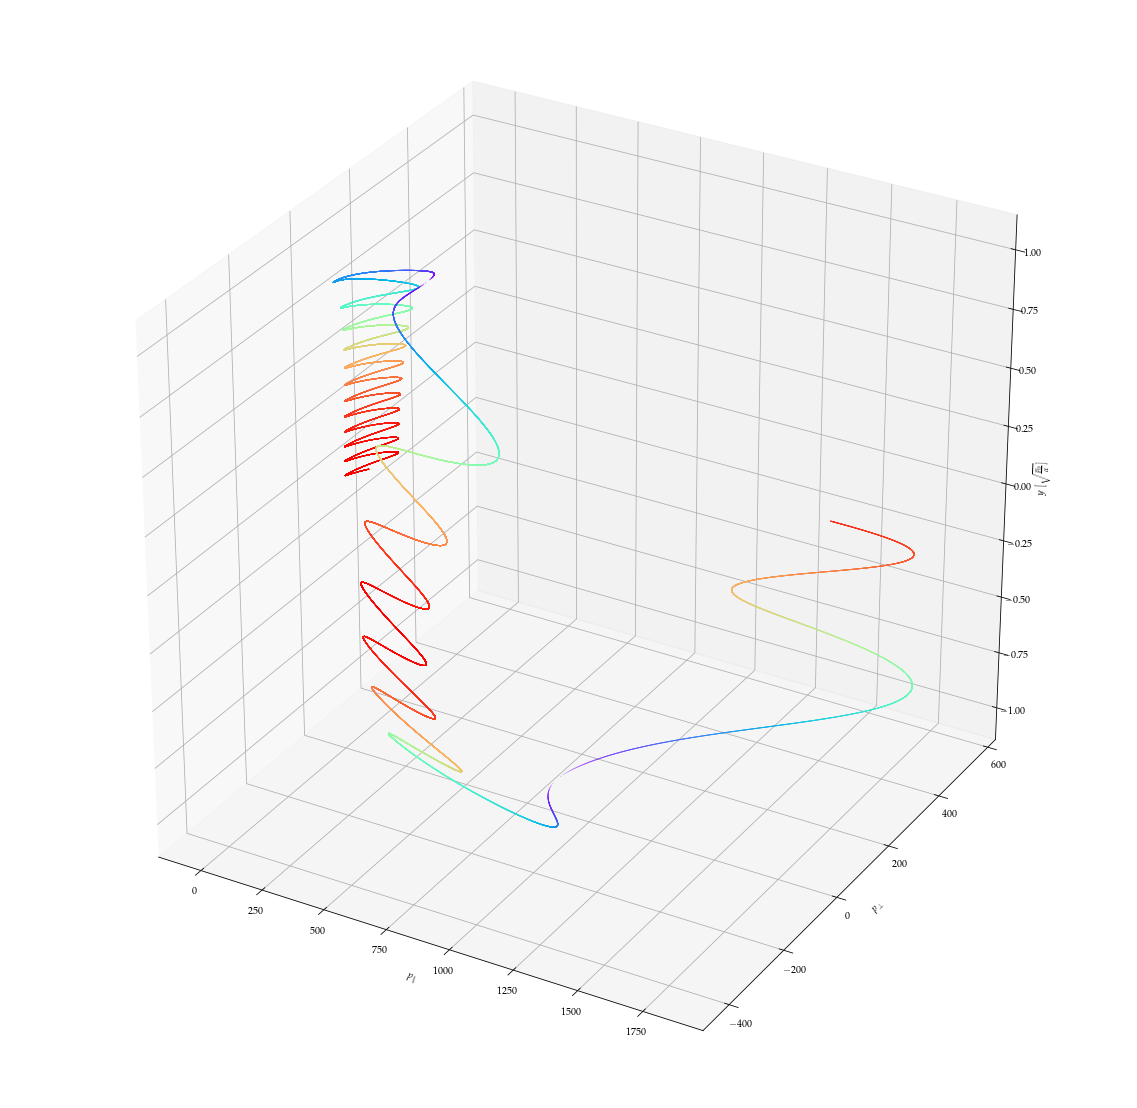

In [70]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(px[n_min:n_max],py[n_min:n_max],w[n_min:n_max]/2/np.pi, c=lgR[n_min:n_max], s=1, cmap='rainbow', edgecolors='None')


p0=100
# Create the mesh in polar coordinates and compute corresponding Z.
y = np.linspace(-0.9, 0.9, 401)
ppy= np.linspace(-400, 400, 401)
Y, Py = np.meshgrid(y, ppy)

Px = (Py**2+1-p0**2*(1-Y**2)**2)/(2*p0*(1-Y**2))

# Express the mesh in the cartesian system.

# Plot the surface.
#ax.plot_surface(Px, Py, Y, cmap=plt.cm.YlGnBu_r)

ax.scatter(px[n_min:n_max],py[n_min:n_max],w[n_min:n_max], c=lgR[n_min:n_max], s=1, cmap='rainbow', edgecolors='None')


# Tweak the limits and add latex math labels.
#ax.set_zlim(0, 1)
ax.set_zlabel(r'$y\ [\sqrt{\frac{p_0}{\alpha}}]$')
ax.set_ylabel(r'$p_\perp$')
ax.set_xlabel(r'$p_\parallel$')

fig.set_size_inches(20, 20)
plt.show()

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


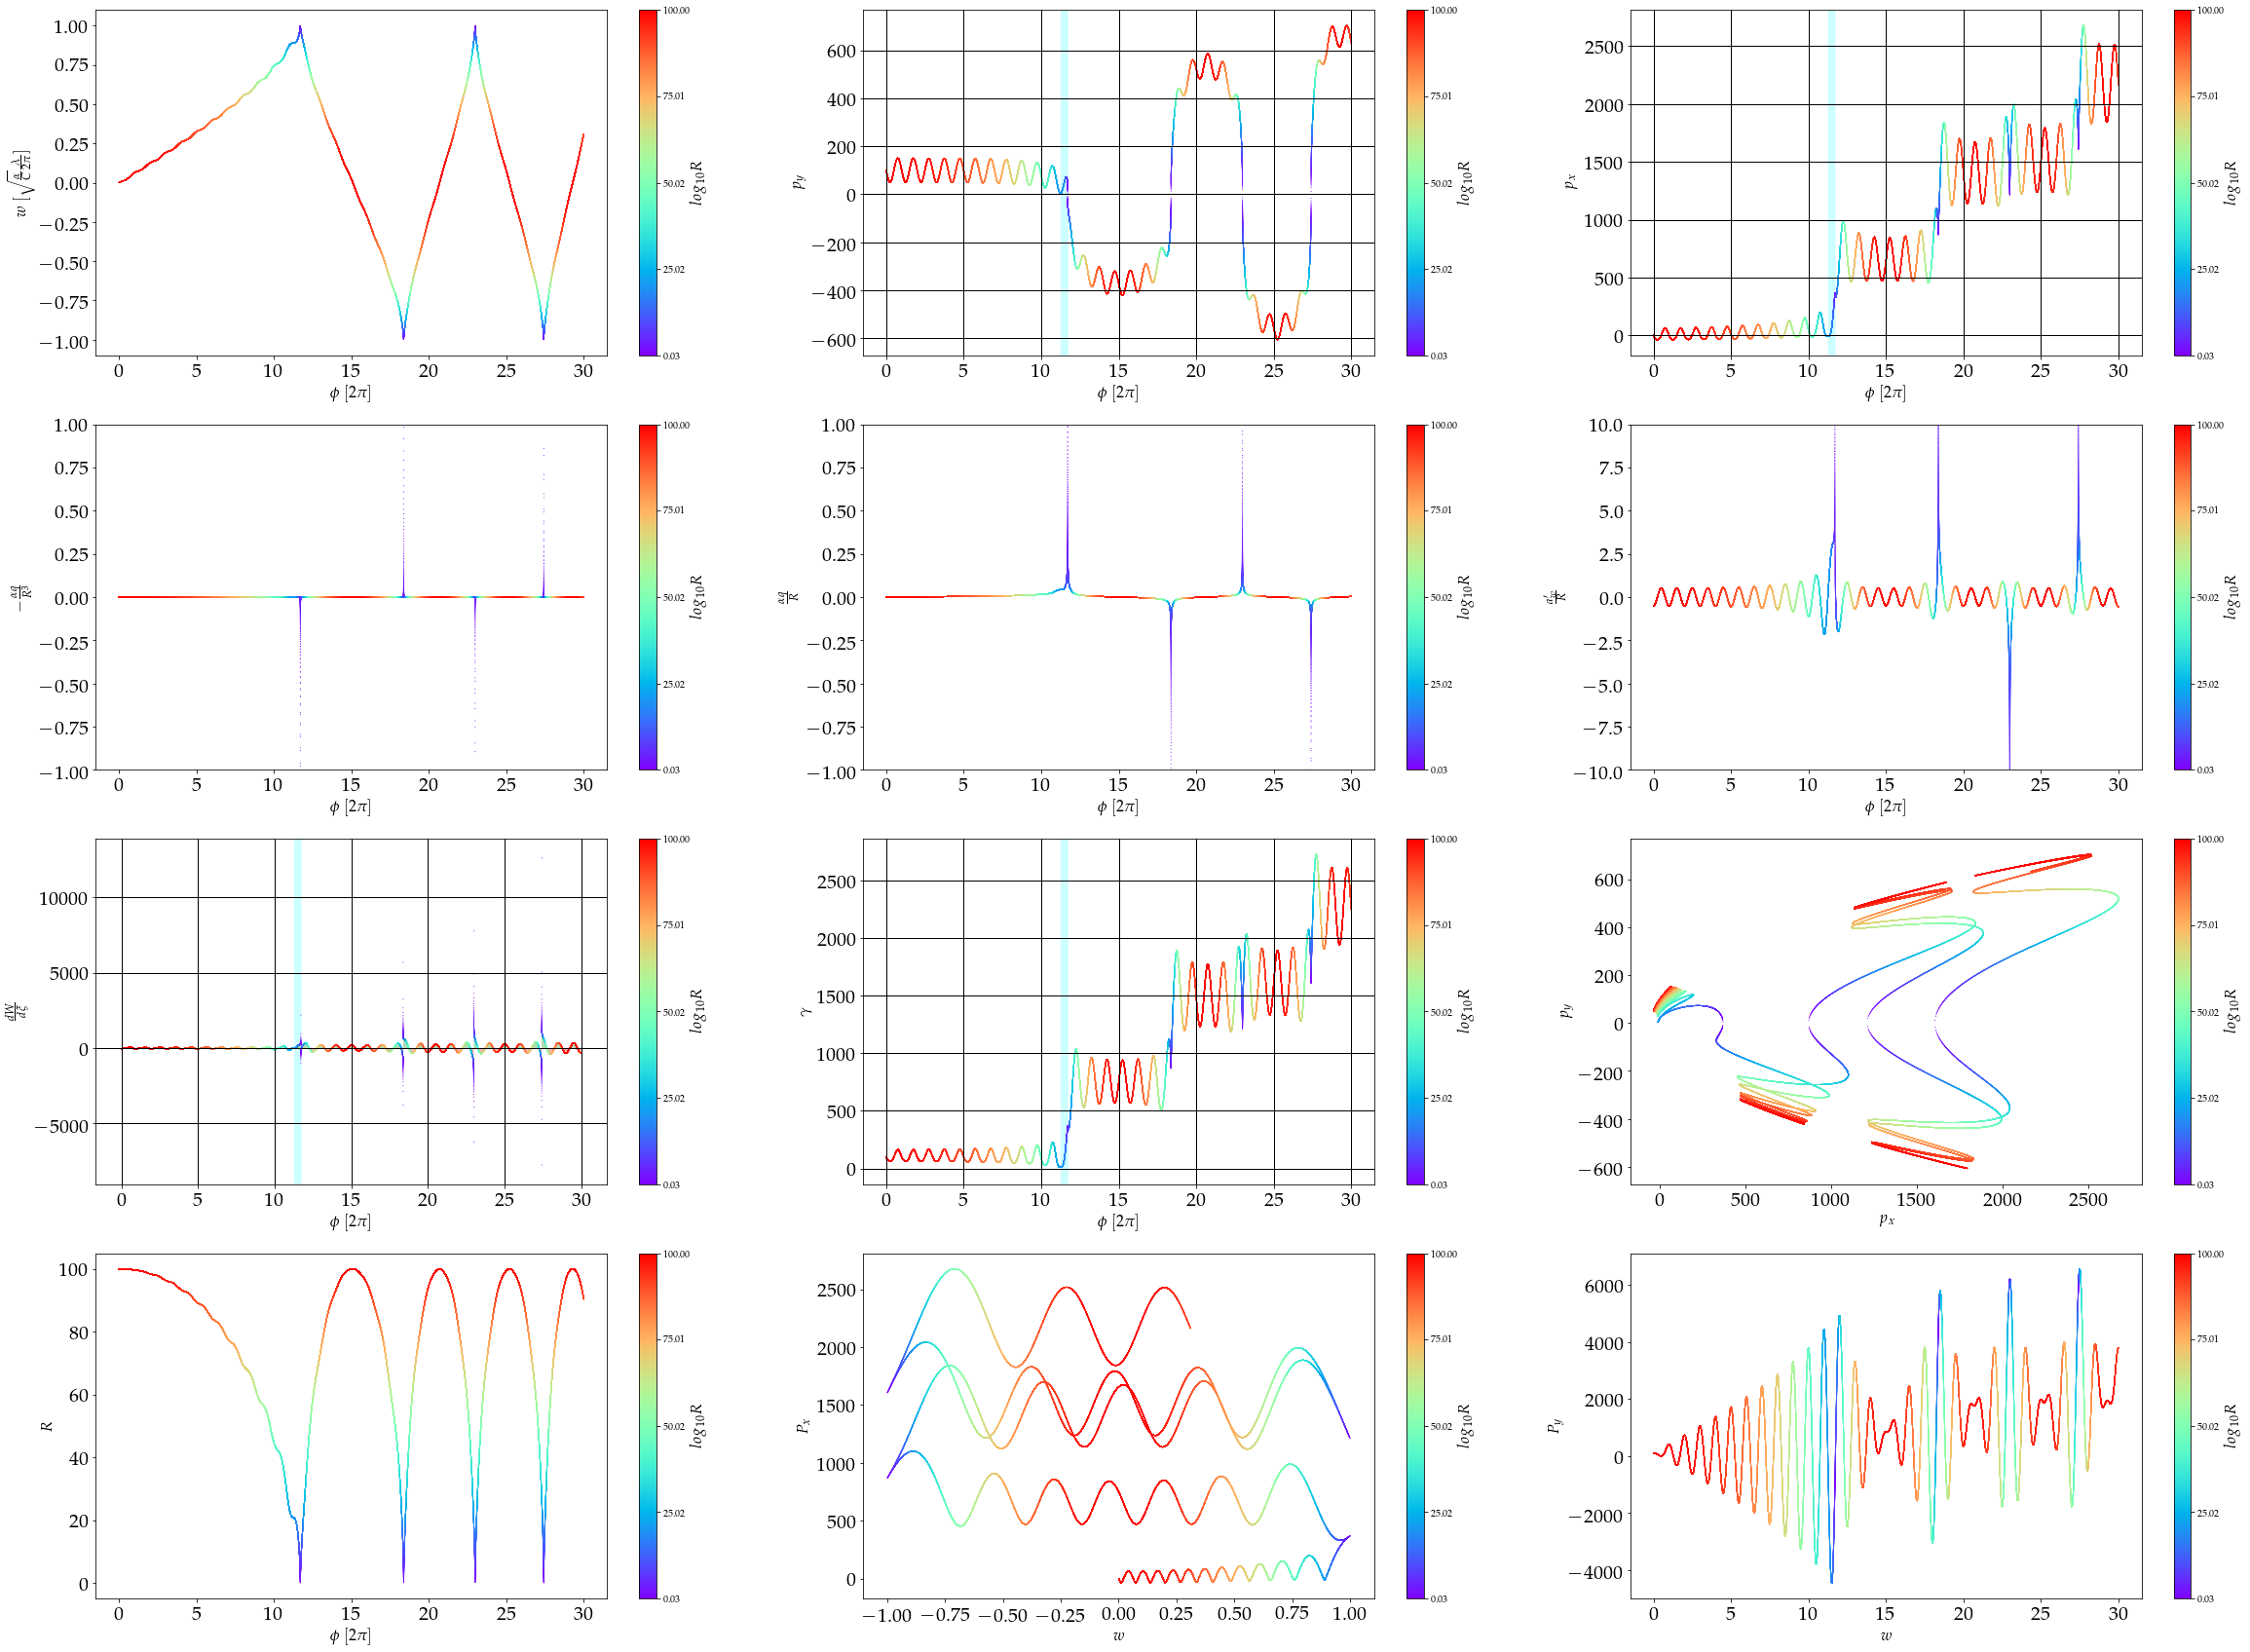

In [72]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results
plt.subplot(4,3,1)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1.1,1.1)
plt.legend(loc='best')

ax=plt.subplot(4,3,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$p_y$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-10,10)
plt.legend(loc='best')

ax=plt.subplot(4,3,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,px[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$p_x$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1,1)
plt.legend(loc='best')


plt.subplot(4,3,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term2[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$-\frac{\alpha q}{R^3}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')

plt.subplot(4,3,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term3[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{\alpha q}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1,1)
plt.legend(loc='best')

plt.subplot(4,3,6)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,term4[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#plt.yscale("log")
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{a_w^\prime}{R}$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-10,10)
plt.legend(loc='best')

# plot results
ax=plt.subplot(4,3,7)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dW}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-700.1,700.1)
plt.legend(loc='best')

ax=plt.subplot(4,3,8)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,9)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(px,py,'g-',label=r'$p_x-p_y$')
plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$p_x$',fontdict=font)
plt.ylabel(r'$p_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,10)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$',fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\phi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(4,3,11)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(w[n_min:n_max],px[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$',fontdict=font)
plt.ylabel(r'$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')



H=(1+py[n_min:n_max]**2)/2/R[n_min:n_max]+0.5*R[n_min:n_max]-q[n_min:n_max]*a0[n_min:n_max]
plt.subplot(4,3,12)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,R,'k-',label=r'$R$')
plt.scatter(t[n_min:n_max]/2/np.pi,H, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.scatter(w[n_min:n_max], py, c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$w$',fontdict=font)
plt.ylabel(r'$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')


#plt.show()
fig = plt.gcf()
fig.set_size_inches(40, 30)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./sum_numerical2/p=100_alpha=0.01_a=80.0.png',format='png',dpi=240)
#plt.close("all")

In [75]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0,p0,alpha):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

for p0 in np.linspace(50,200,11):
    for alphad in np.linspace(-3.5,0.5,11):
        p0=p0
        alpha=10**alphad
        A0=100.0

        # initial condition
        P0=p0
        alpha=alpha
        C1=(P0**2+1.0)**0.5
        #z0 = [0,0]
        z0 = [(alpha/C1)**0.5,0]

        # number of time points
        nsteps=200000

        # time points
        t = np.linspace(0,20*2*np.pi,nsteps)

        # step input laser a0
        a0 = -A0*np.cos(t)

        # store solution
        u = np.empty_like(t)
        w = np.empty_like(t)
        # record initial conditions
        u[0] = z0[0]
        w[0] = z0[1]

        # solve ODE
        for i in range(1,nsteps):
            # span for next time step
            tspan = [t[i-1],t[i]]
            # solve for next step
            z = odeint(model,z0,tspan,args=(a0[i],p0,alpha))
            # store solution for plotting
            u[i] = z[1][0]
            w[i] = z[1][1]
            # next initial condition
            z0 = z[1] 

        R=C1-alpha*w**2*C1/alpha    
        py=u*R*(C1/alpha)**0.5

        gamma=(1+py**2+R**2)/2/R
        px=gamma-R
        q=w*(C1/alpha)**0.5

        d_work=py/R*a0

        term1=alpha*q*(py/R)**2/R
        term2=-alpha*q/R**3
        term3=alpha*q/R
        term4=a0/R

        n_min=0 # 104999 #99999# 74999 #35000
        n_max=199999 # 124999 #5000 #399999
        lgR=R[n_min:n_max]
        #lgR=np.log10(R[n_min:n_max])
        # plot results


        plt.subplot(1,2,1)
        x=np.linspace(0,20*2*np.pi,2001)
        y=p0*np.cos(x/(4*12.5))-np.sin(x)*A0
        plt.plot(x/2/3.14,y,'--k')
        plt.scatter(t[n_min:n_max]/2/np.pi,py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')

        plt.subplot(1,2,2)
        plt.scatter(t[n_min:n_max]/2/np.pi,R[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')

        T=4*0.71*(p0/alpha)**0.5
        b=alpha**0.5/p0**1.5*(T*p0*np.sin(x/T)+A0*np.cos(x)-A0)
        #k=((9.0*b**2-4)-3*b)**0.33333/(2.0)**0.333333
        #t=k+1.0/k
        y=(1-b**2)*p0

        plt.plot(x/2/3.14,y,'--k')

        fig = plt.gcf()
        fig.set_size_inches(20, 10)
        fig.savefig('./sum_numerical2/a=100_p='+str(int(p0))+'_alpha='+str(alphad)+'.png',format='png',dpi=240)
        plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnin

In [88]:
x=np.linspace(0,2*np.pi,201)
y=np.cos(x)
print(y)
z=y[1:-1]-y[0:-2]
z[z <=0][0]

[  1.00000000e+00   9.99506560e-01   9.98026728e-01   9.95561965e-01
   9.92114701e-01   9.87688341e-01   9.82287251e-01   9.75916762e-01
   9.68583161e-01   9.60293686e-01   9.51056516e-01   9.40880769e-01
   9.29776486e-01   9.17754626e-01   9.04827052e-01   8.91006524e-01
   8.76306680e-01   8.60742027e-01   8.44327926e-01   8.27080574e-01
   8.09016994e-01   7.90155012e-01   7.70513243e-01   7.50111070e-01
   7.28968627e-01   7.07106781e-01   6.84547106e-01   6.61311865e-01
   6.37423990e-01   6.12907054e-01   5.87785252e-01   5.62083378e-01
   5.35826795e-01   5.09041416e-01   4.81753674e-01   4.53990500e-01
   4.25779292e-01   3.97147891e-01   3.68124553e-01   3.38737920e-01
   3.09016994e-01   2.78991106e-01   2.48689887e-01   2.18143241e-01
   1.87381315e-01   1.56434465e-01   1.25333234e-01   9.41083133e-02
   6.27905195e-02   3.14107591e-02  -1.60812265e-16  -3.14107591e-02
  -6.27905195e-02  -9.41083133e-02  -1.25333234e-01  -1.56434465e-01
  -1.87381315e-01  -2.18143241e-01

-0.00049343963426839998

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


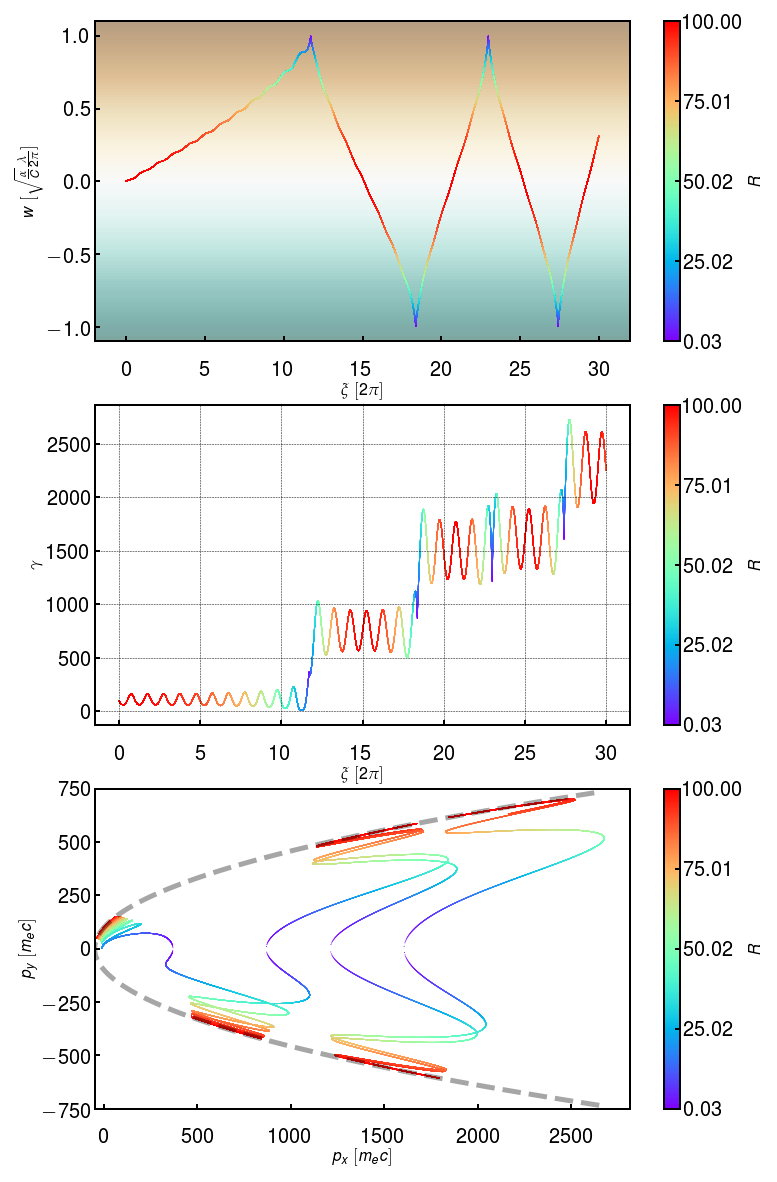

In [97]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib as mpl
mpl.style.use('https://gist.github.com/danielballan/be066529de85e87a5fe7/raw')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

#font = {'family' : 'Helvetica',
#        'color'  : 'black',
#        'weight' : 'normal',
#        'size'   : 16,
#        }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

plt.subplot(3,1,1)
x_grid = np.linspace(-2.0,32.0,401)
y_grid = np.linspace(-1.2,1.2,401)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Bz = -2*alpha*y_grid*(alpha*P0)**0.5
eee=np.max([-np.min(Bz),np.max(Bz)])
levels = np.linspace(-eee, eee, 128)
plt.contourf(x_grid, y_grid, Bz, levels=levels, cmap=cm.BrBG, alpha=.5)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        

plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1.1,1.1)
plt.legend(loc='best')

ax=plt.subplot(3,1,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')

#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(3,1,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(px,py,'g-',label=r'$p_x-p_y$')
p_py = np.linspace(-750.0,750.0,401)
p_px = np.linspace(-50.0,2650.0,601)

[p_px,p_py] = np.meshgrid(p_px,p_py)

p_R = (1+p_px**2+p_py**2)**0.5-p_px
levels = np.linspace(np.min(p_R), np.max(p_R), 32)
plt.contour(p_px, p_py, p_R, np.array([100]),linestyles='dashed',linewidth=0.5, alpha=0.35)

plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$p_x\ [m_ec]$',fontdict=font)
plt.ylabel(r'$p_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')




#plt.show()
fig = plt.gcf()
fig.set_size_inches(12, 20)
#fig.set_size_inches(5, 4.5)
fig.savefig('./figure1.png',format='png',dpi=480)
#plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


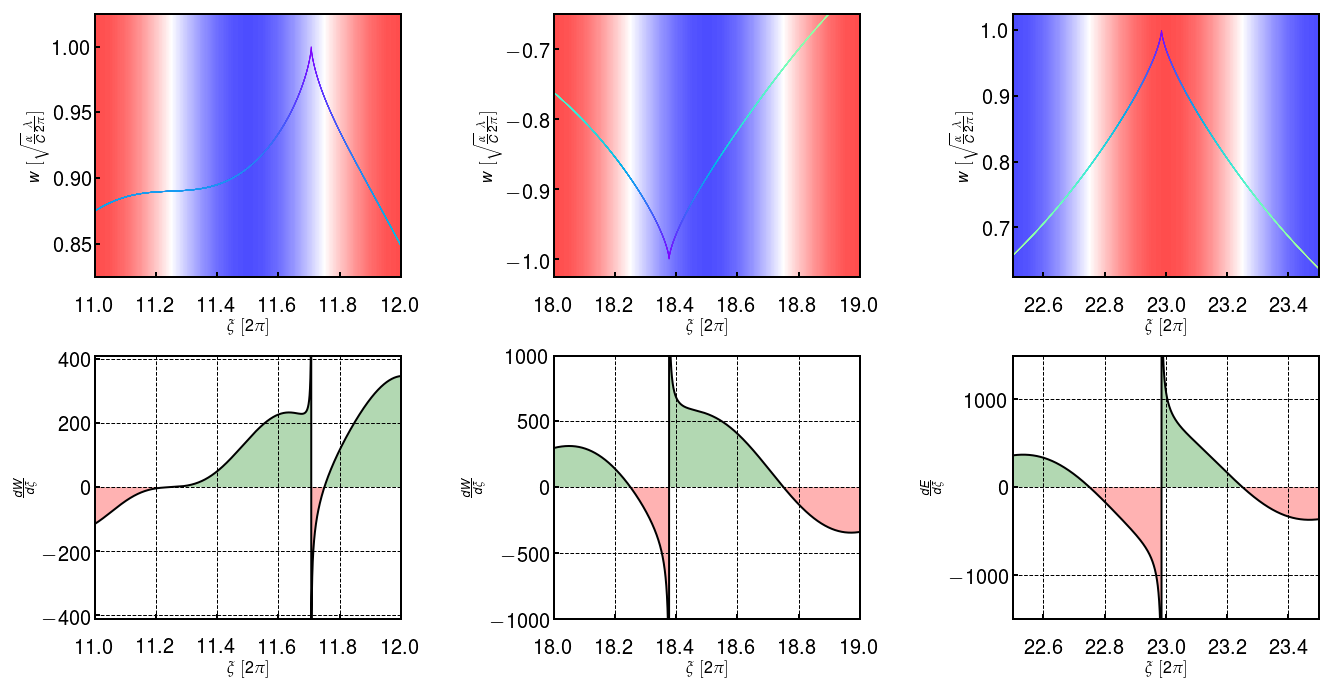

In [95]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://gist.github.com/danielballan/be066529de85e87a5fe7/raw')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

#font = {'family' : 'helvetica',
#        'color'  : 'black',
#        'weight' : 'normal',
#        'size'   : 16,
#        }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(0,30.0,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)



plt.subplot(2,3,1)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(0.825,1.025)
plt.xlim(11.0,12.0)
plt.legend(loc='best')

plt.subplot(2,3,2)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1.025,-0.65)
plt.xlim(18.0,19.0)
plt.legend(loc='best')

plt.subplot(2,3,3)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(0.625,1.025)
plt.xlim(22.5,23.5)
plt.legend(loc='best')

ax=plt.subplot(2,3,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=109999
n_max=119999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dW}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-409.9,409.9)
plt.xlim(11.0,12.0)
plt.legend(loc='best')

ax=plt.subplot(2,3,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=179999
n_max=189999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dW}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1000.1,1000.1)
plt.xlim(18.0,19.0)
plt.legend(loc='best')

ax=plt.subplot(2,3,6)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=224999
n_max=234999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.ylim(-1500.1,1500.1)
plt.xlim(22.5,23.5)
plt.legend(loc='best')

#plt.show()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.30, wspace=0.50)
fig = plt.gcf()
fig.set_size_inches(20, 10)
#fig.set_size_inches(5, 4.5)
fig.savefig('./figure2.png',format='png',dpi=480)
#plt.close("all")

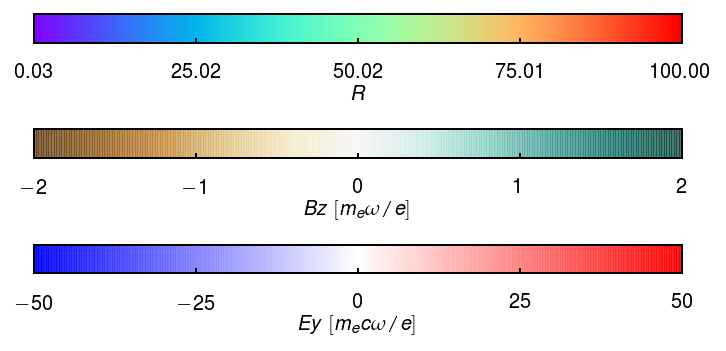

In [96]:
'''
====================
Customized colorbars
====================

This example shows how to build colorbars without an attached mappable.
'''

import matplotlib.pyplot as plt
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.85, 0.9, 0.10])
ax2 = fig.add_axes([0.05, 0.45, 0.9, 0.10])
ax3 = fig.add_axes([0.05, 0.05, 0.9, 0.10])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.rainbow
norm = mpl.colors.Normalize(vmin=0.03, vmax=100)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',ticks=np.linspace(0.03, 100, 5))
cb1.set_label(r'$R$')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.BrBG
Bz = -2*1*(1.0)**0.5
norm = mpl.colors.Normalize(vmin=-abs(Bz), vmax=abs(Bz))
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',ticks=np.linspace(-abs(Bz), abs(Bz), 5),alpha=0.7)
cb2.set_label(r'$Bz\ [m_e\omega/e]$')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.bwr
a0=50
norm = mpl.colors.Normalize(vmin=-abs(a0), vmax=abs(a0))
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',ticks=np.linspace(-abs(a0), abs(a0), 5),alpha=0.9)
cb3.set_label(r'$Ey\ [m_ec\omega/e]$')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')


fig = plt.gcf()
fig.set_size_inches(10, 4)
fig.savefig('./figure3.png',format='png',dpi=480)
plt.show()

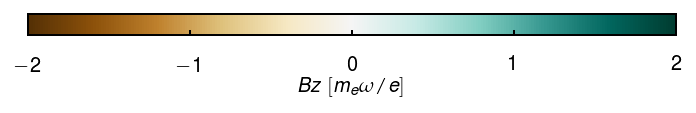

In [86]:
'''
====================
Customized colorbars
====================

This example shows how to build colorbars without an attached mappable.
'''

import matplotlib.pyplot as plt
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
#ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
#ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.BrBG
Bz = -2*1*(1.0)**0.5
norm = mpl.colors.Normalize(vmin=-abs(Bz), vmax=abs(Bz))
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',ticks=np.linspace(-abs(Bz), abs(Bz), 5))
cb1.set_label(r'$Bz\ [m_e\omega/e]$')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.

fig = plt.gcf()
fig.set_size_inches(10, 2)
plt.show()